# Extracting Neuraly Relevant Information from the Shape of the Hemodynamic Response
## Note on the construction of this document
This documentation was constructed retrospectively to accompany manuscrpit publication (thesis).
It initially aimed to be a walk-through of the three neuroimaging data sets acquired during my PhD. It however ended-up focusing on the main dataset used in my thesis.
## Abstract
## Context
## Working Model and Hypothesis

## Experimental Approach and Data Acquisition
### Stimuli
### Functional MRI Paradigm
In each 
Stimuli were presented at one of two orthogonal orientations (+/- 45 degrees) in alternating 6-sec ON and 6-sec OFF blocs. This produced sinusoidal BOLD signal variations in V1 cortex.Stimuli were presented at one of two orthogonal orientations (+/- 45 degrees) in alternating 6-sec ON and 6-sec OFF blocs. This produced sinusoidal BOLD signal variations in V1 cortex.

Please get the data from the repo if not done already
data repo: /Users/sebastienproulx/OneDrive - McGill University/dataBig
IN: anatomical V1 roi (C-derived/DecodingHR/anat/z)
IN: preprocessed functionals (C-derived/DecodingHR/fun/x)
IN: stimulus timing (B-clean/DecodingHR/stim/160118_cyclicStim/data)
F(IN)=OUT: 2-df sinusoidal fit to single voxel time series
OUT: fit params and stats + HRF estimates (C-derived/DecodingHR/fun/y)
Not actually running because way too long
/Users/sebastienproulx/OneDrive - McGill University/dataBig/C-derived/DecodingHR/fun/y/designMatrices.fig


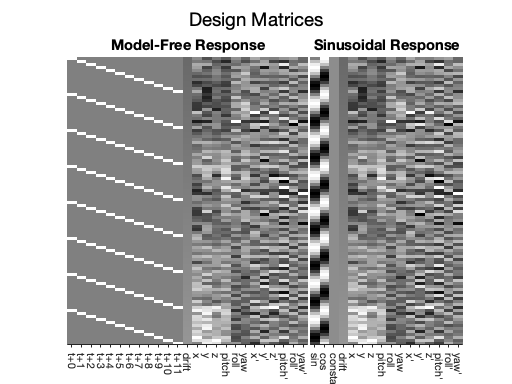

In [20]:
clear all
addpath(genpath(fullfile(pwd,'matlabFun')));
runFit

Not actually running to save some time
IN: anatomical V1 roi (C-derived\DecodingHR\anat\z)
IN: voxel visual field eccentricity (C-derived\DecodingHR\anat\z)
IN: sinusoidal fit results (C-derived\DecodingHR\fun\y)
F(IN)=OUT: masks the fit according to voxel eccentricity and activation level
Figures are additionally thresholded for activation level, but not the data that is saved!
OUT: sinusoidal fit results (C-derived\DecodingHR\fun\zSin)


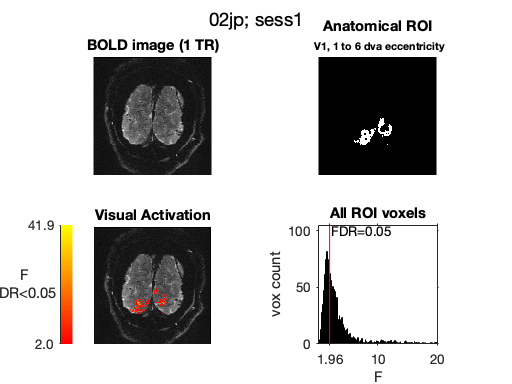

In [21]:
fitType = 'mixed'; % 'mixed' or 'fixed'
threshType = 'fdr'; % 'none', 'p' or 'fdr'
maskSinAndHrFit(fitType,threshType)

## Prediction 1: Competing stimuli will evoke a smaller and more delayed HR

### Visualize the sinusoidal response in V1

IN: BOLD hemodynamic responses (HR) from anatomical V1 ROI (C-derived/DecodingHR/zHr)
F(IN)->OUT: threshold included voxels and analyse HR averaged across the ROI
OUT: figures

ans =

    0.9290    0.6940    0.1250
    0.8500    0.3250    0.0980
         0    0.4470    0.7410



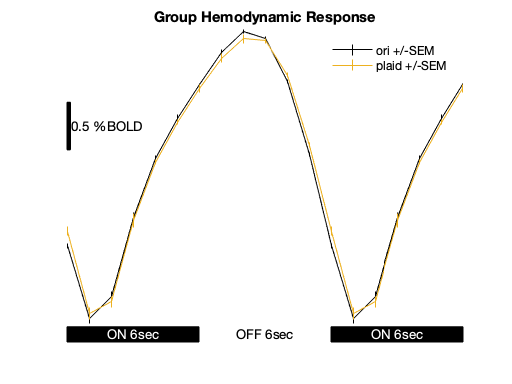

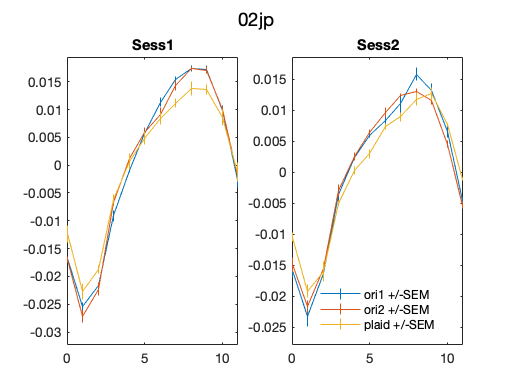

In [22]:
hrGroupAnalysis(threshType)

### Compare responses evoked by different stimuli

IN: Sinusoidal BOLD responses from anatomical V1 ROI (C-derived/DecodingHR/zSin)
threshVal=0.05
adjVoxDelay=0
F(IN)=OUT: threshold included voxels and analyse responses averaged across the ROI
OUT: figures and stats
***
delay diff=0.062ms
***
---------------
Cartesian Space
---------------
Ori vs Plaid:
Hotelling's T^2 multivariate test
 T^2=7.16
 p=0.17
Ori1 vs Ori2:
 Hotelling's T^2 multivariate test
 T^2=1.39; p=0.61
---------------
Polar Amplitude
---------------
Ori vs Plaid:
 Student's t-test
 t=0.96; p=0.38
 Wilcoxon signed rank test
 signed rank=14.00; p=0.56
Ori1 vs Ori2:
 Student's t-test
 t=0.89; p=0.41
 Wilcoxon signed rank test
 signed rank=15.00; p=0.44
-----------
Polar Delay
-----------
Ori vs Plaid:
 Student's t-test
 t=3.92; p=0.01
 Wilcoxon signed rank test
 signed rank=21.00; p=0.03
 Hotelling's test for angular means
 F=21.00; p=0.06
Ori1 vs Ori2:
 Student's t-test
 t=0.17; p=0.87
 Wilcoxon signed rank test
 signed rank=12.00; p=0.84
 Hotelling's test for angular m

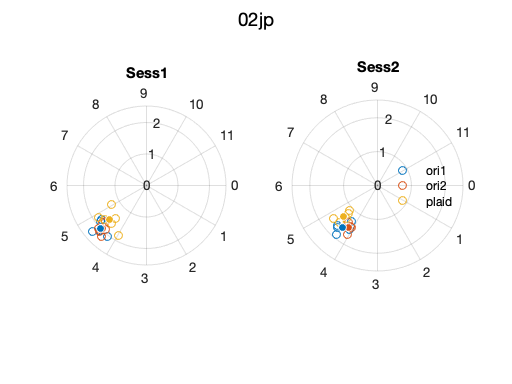

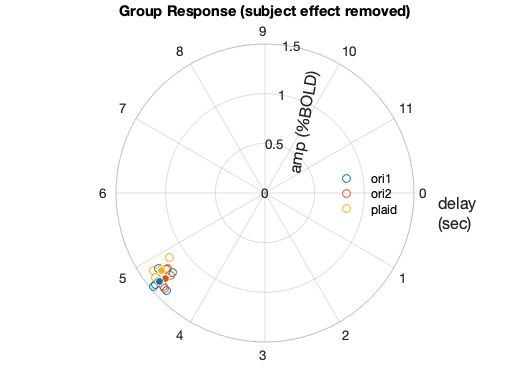

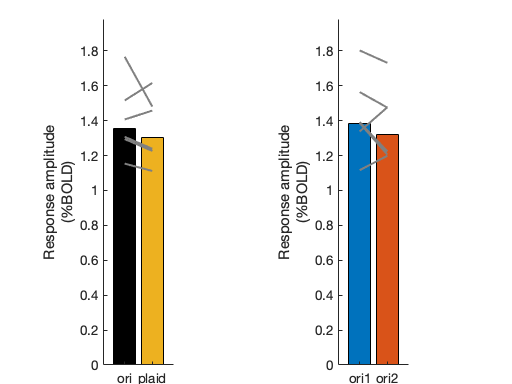

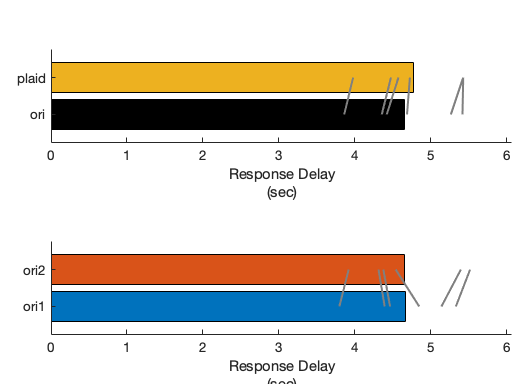

In [33]:
sinusoidalGroupAnalysis(threshType)

### Conclusion on Prediction 1

## Prediction 2: Stimulus orientation can be predicted not only from the multivoxel pattern of BOLD responses, but also from the pattern of BOLD delays

In [24]:
clear res
featSelType = 'respF_fdr'; % 'none', 'respF_p', 'respF_fdr', 'oriT_nVoxAsF' or 'oriT_p'

svmSpace = 'cartReal';
resTmp = runDecoding(featSelType,svmSpace);
disp(['mean(nObs) =' num2str(round(mean(mean(resTmp.nObs,2),1)))])
disp(['mean(nFeat)=' num2str(round(mean(mean(resTmp.nDim,2),1)))])
res.ampAtPeak = resTmp;

svmSpace = 'polMag';
resTmp = runDecoding(featSelType,svmSpace);
disp(['mean(nObs) =' num2str(round(mean(mean(resTmp.nObs,2),1)))])
disp(['mean(nFeat)=' num2str(round(mean(mean(resTmp.nDim,2),1)))])
res.mag = resTmp;

svmSpace = 'polDelay';
resTmp = runDecoding(featSelType,svmSpace);
disp(['mean(nObs) =' num2str(round(mean(mean(resTmp.nObs,2),1)))])
disp(['mean(nFeat)=' num2str(round(mean(mean(resTmp.nDim,2),1)))])
res.delay = resTmp;

------
IN: Sinusoidal BOLD responses from anatomical V1 ROI (C-derived/DecodingHR/zSin)
F(IN)=OUT: threshold included voxels and decode ROI response pattern to predict stimulus orientation
OUT: figures and stats (C-derived/DecodingHR/zSin)
---
SVM space: cartReal; Vox selection: respF_fdr
Group accuracy = 81/144 (56.2%; binomial p=0.057)
mean(nObs) =12
mean(nFeat)=1400
------
IN: Sinusoidal BOLD responses from anatomical V1 ROI (C-derived/DecodingHR/zSin)
F(IN)=OUT: threshold included voxels and decode ROI response pattern to predict stimulus orientation
OUT: figures and stats (C-derived/DecodingHR/zSin)
---
SVM space: polMag; Vox selection: respF_fdr
Group accuracy = 82/144 (56.9%; binomial p=0.040)
mean(nObs) =12
mean(nFeat)=1400
------
IN: Sinusoidal BOLD responses from anatomical V1 ROI (C-derived/DecodingHR/zSin)
F(IN)=OUT: threshold included voxels and decode ROI response pattern to predict stimulus orientation
OUT: figures and stats (C-derived/DecodingHR/zSin)
---
SVM space: pol

In [25]:
fieldList = fields(res); clear accGroup pGroup
for fieldInd = 1:length(fieldList)
    accGroup(fieldInd) = sum(res.(fieldList{fieldInd}).acc(:).*res.(fieldList{fieldInd}).nObs(:)) / sum(res.(fieldList{fieldInd}).nObs(:))*100;
    pGroup(fieldInd) = binocdf(sum(res.(fieldList{fieldInd}).acc(:).*res.(fieldList{fieldInd}).nObs(:)),sum(res.(fieldList{fieldInd}).nObs(:)),0.5,'upper');
end
disp(fieldList')
disp(['       acc = ' num2str(accGroup,3)])
disp(['binomial p = ' num2str(pGroup,3)])

    {'ampAtPeak'}    {'mag'}    {'delay'}

       acc = 56.2      56.9      52.1
binomial p = 0.0565    0.0399      0.28


signedrank = 18       18       15
         p = 0.062    0.062      0.2


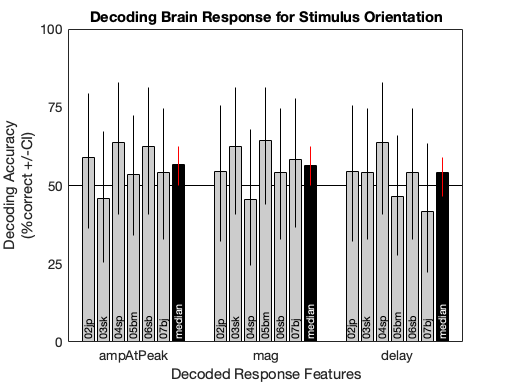

In [26]:
plotDecoding(res)

### Conclusion on Prediction 2